In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Pune house data.csv')

In [5]:
type(df)

df.head()


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [6]:
len(df)

13320

In [7]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [8]:
df = df.drop(['area_type', 'availability', 'society' ], axis = 1)

In [9]:
df.head()


,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,3 BHK,1521,3.0,1.0,95.00,Aundh
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [12]:
df.isnull().sum()

size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [15]:
df = df.drop(['balcony'],axis = 1)



KeyError: "['balcony'] not found in axis"

In [16]:
df.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [18]:
df = df.dropna()
len(df)

13246

In [19]:
df.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [20]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [22]:
df.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [23]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [24]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
len(df['total_sqft'].unique())

2067

In [26]:
def checkFloat(number):
  try:
    float(number)

  except:
    return False
  return True


In [27]:
df[~df['total_sqft'].apply(checkFloat)].head()

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2


In [28]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [29]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [31]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


AttributeError: 'float' object has no attribute 'split'

In [33]:

df.head(10)

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2
5,2 BHK,1170.0,2.0,38.00,Balaji Nagar,2
6,4 BHK,2732.0,4.0,204.00,Baner,4
7,4 BHK,3300.0,4.0,600.00,Baner road,4
8,3 BHK,1310.0,3.0,63.25,Bhandarkar Road,3
9,6 Bedroom,1020.0,6.0,370.00,Bhavani Peth,6


In [36]:

df['price_per_sqft'] = (df['price']*100000/df['total_sqft'])
df.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [40]:
len(df.site_location.unique())
df.site_location = df.site_location.apply(lambda x: x.strip())
len(df.site_location.unique())

97

In [41]:
loc_stats = df.groupby('site_location').site_location.agg('count').sort_values(ascending = False)
loc_stats

site_location
Alandi Road        139
Karve Nagar        139
Paud Road          139
Ganeshkhind        139
Parvati Darshan    139
                  ... 
Shukrawar Peth     136
Satara Road        136
Model colony       136
Vadgaon Budruk     134
other                1
Name: site_location, Length: 97, dtype: int64

In [42]:
loc_stats[loc_stats <= 10]

#

site_location
other    1
Name: site_location, dtype: int64

In [44]:
len(df[df.total_sqft/df.bhk < 300])
df

744

In [45]:
df = df[~(df.total_sqft/df.bhk < 300)]

In [46]:
len(df)

12502

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10883, 7)

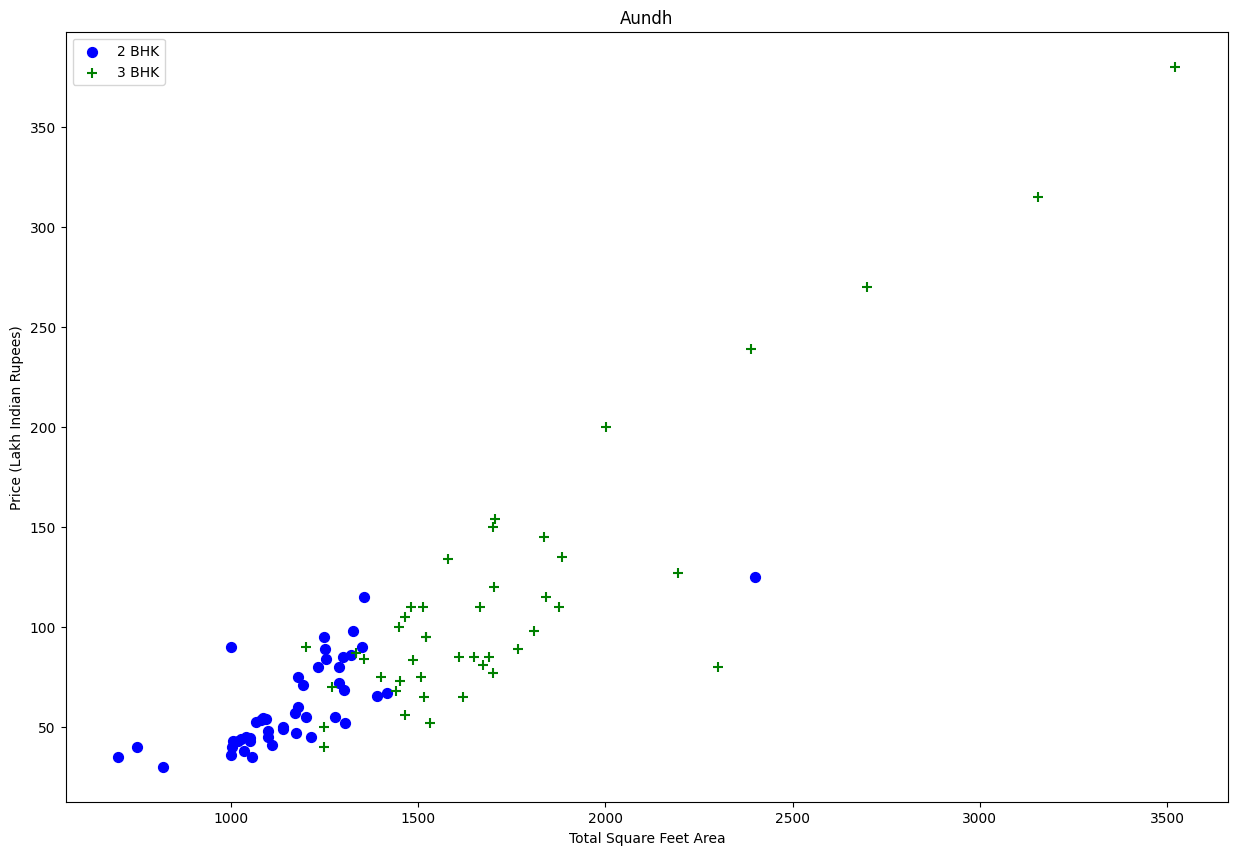

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Aundh")

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)


(7543, 7)

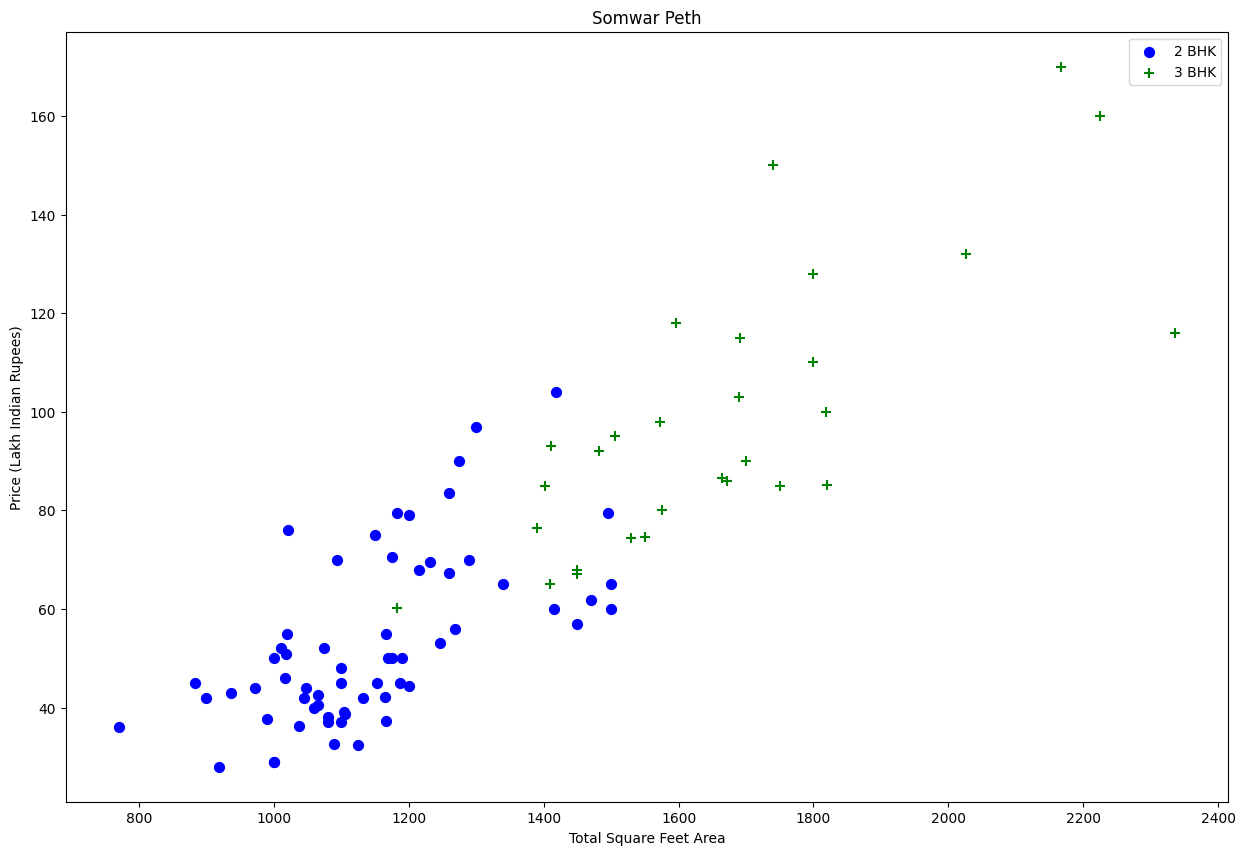

In [58]:
plot_scatter_chart(df,"Somwar Peth")

In [59]:
df = df[df.bath<df.bhk+2]
df.shape

(7479, 7)

In [61]:
df = df.drop(['size','price_per_sqft'],axis=1)
df.head()

KeyError: "['size', 'price_per_sqft'] not found in axis"

In [64]:
dummies = pd.get_dummies(df.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df = pd.concat([df, dummies], axis='columns')
df.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,Alandi Road,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,80.00,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,130.00,Alandi Road,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df = df.drop('site_location', axis='columns')
df.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
X = df.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
Y = df.price
Y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [75]:
# prompt: apply knn on x train and test it

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)


0.815538117356007

In [72]:
# prompt: apply linear regression and compare

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)


0.8235192062841552

In [78]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return knn.predict([x])[0]

In [80]:
predict_price('Aundh',1000, 2, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


88.33333333333333

In [81]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(lr_clf,f)
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))